In [2]:
#Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb

In [3]:
df = pd.read_csv("NBA Champion RawData.csv")
print(list(df.columns))

['Season', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Conference 5=> rec', 'Conference OR', 'Conference SRS', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over500 rec', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum champion share', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum all stars', 'sum player L1Y cs', 'sum player L3Y cs', 'sum player L5Y cs', 'sum player L8Y cs', 'sum player L10Y cs', 'sum L3Y mvp shares ', 'sum L5Y  mvp shares', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'sum franchise L10Y cs', 'team_rating_custom', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P

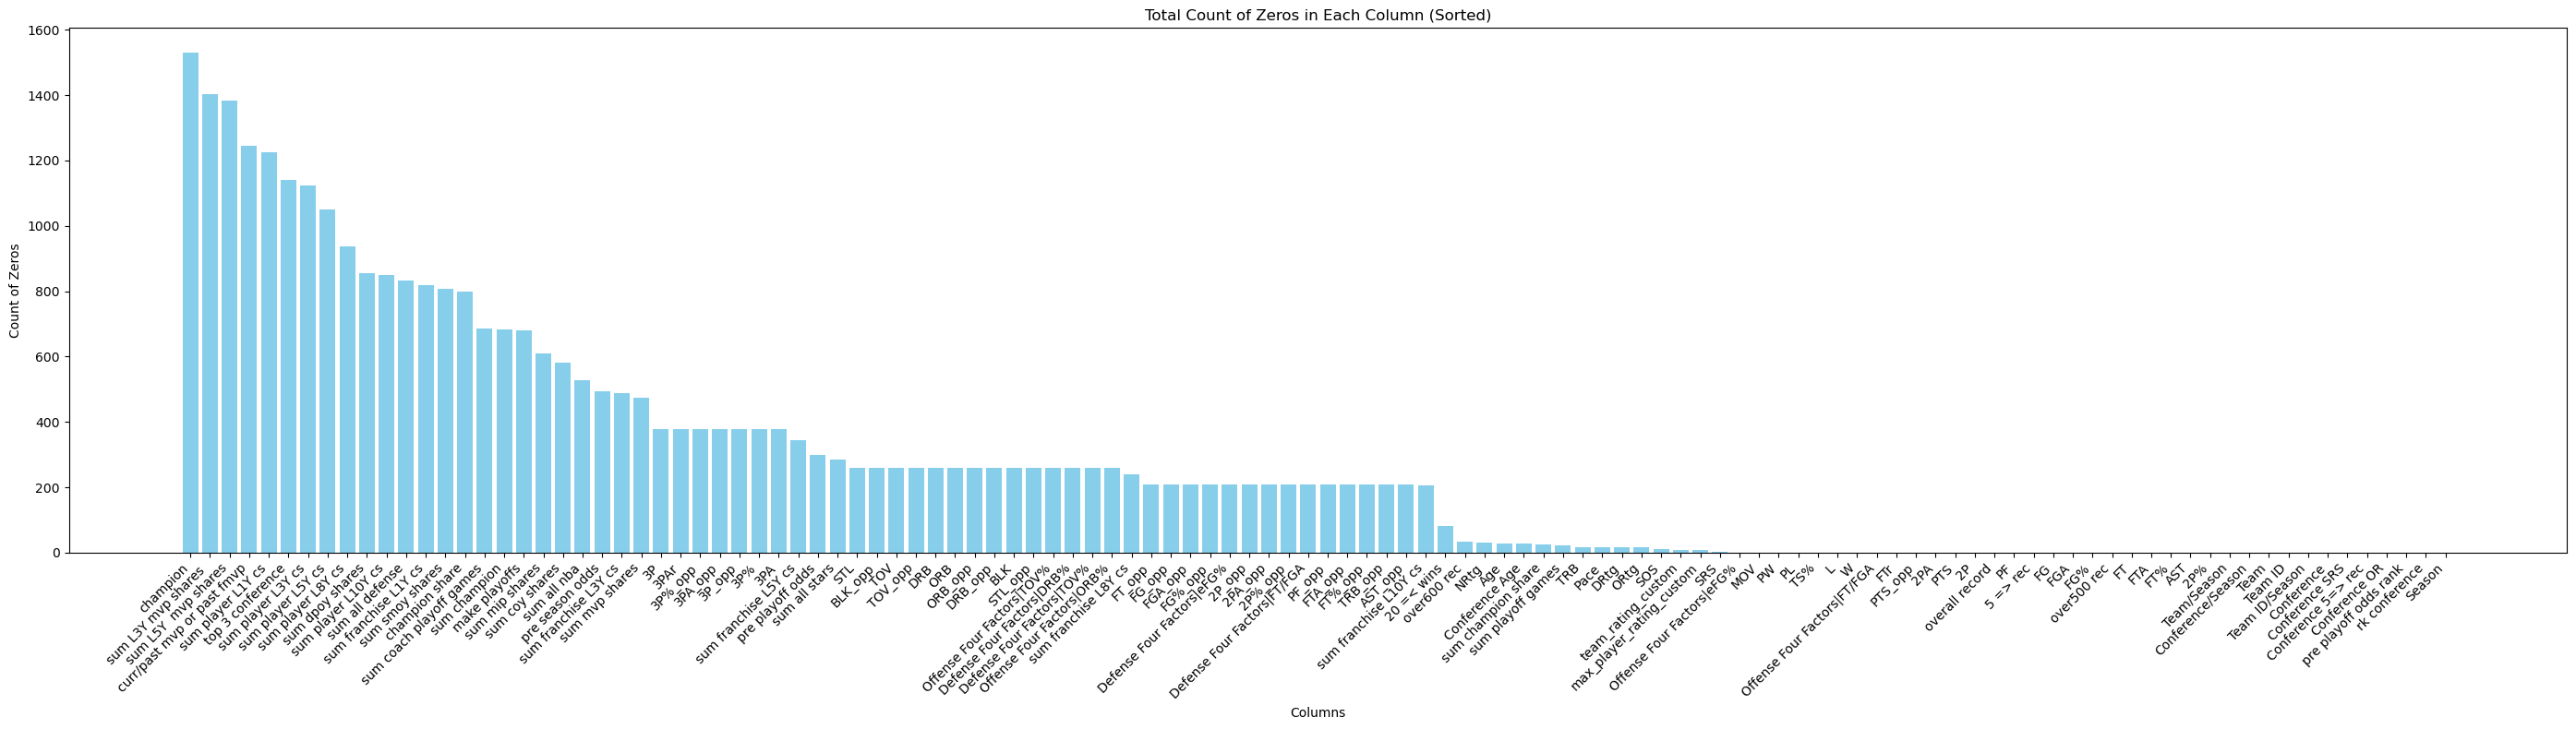

In [4]:
zero_counts = df.eq(0).sum()

zero_counts_sorted = zero_counts.sort_values(ascending=False)

plt.figure(figsize=(28, 8))
plt.bar(zero_counts_sorted.index, zero_counts_sorted.values, color='skyblue')
plt.title('Total Count of Zeros in Each Column (Sorted)')
plt.xlabel('Columns')
plt.ylabel('Count of Zeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

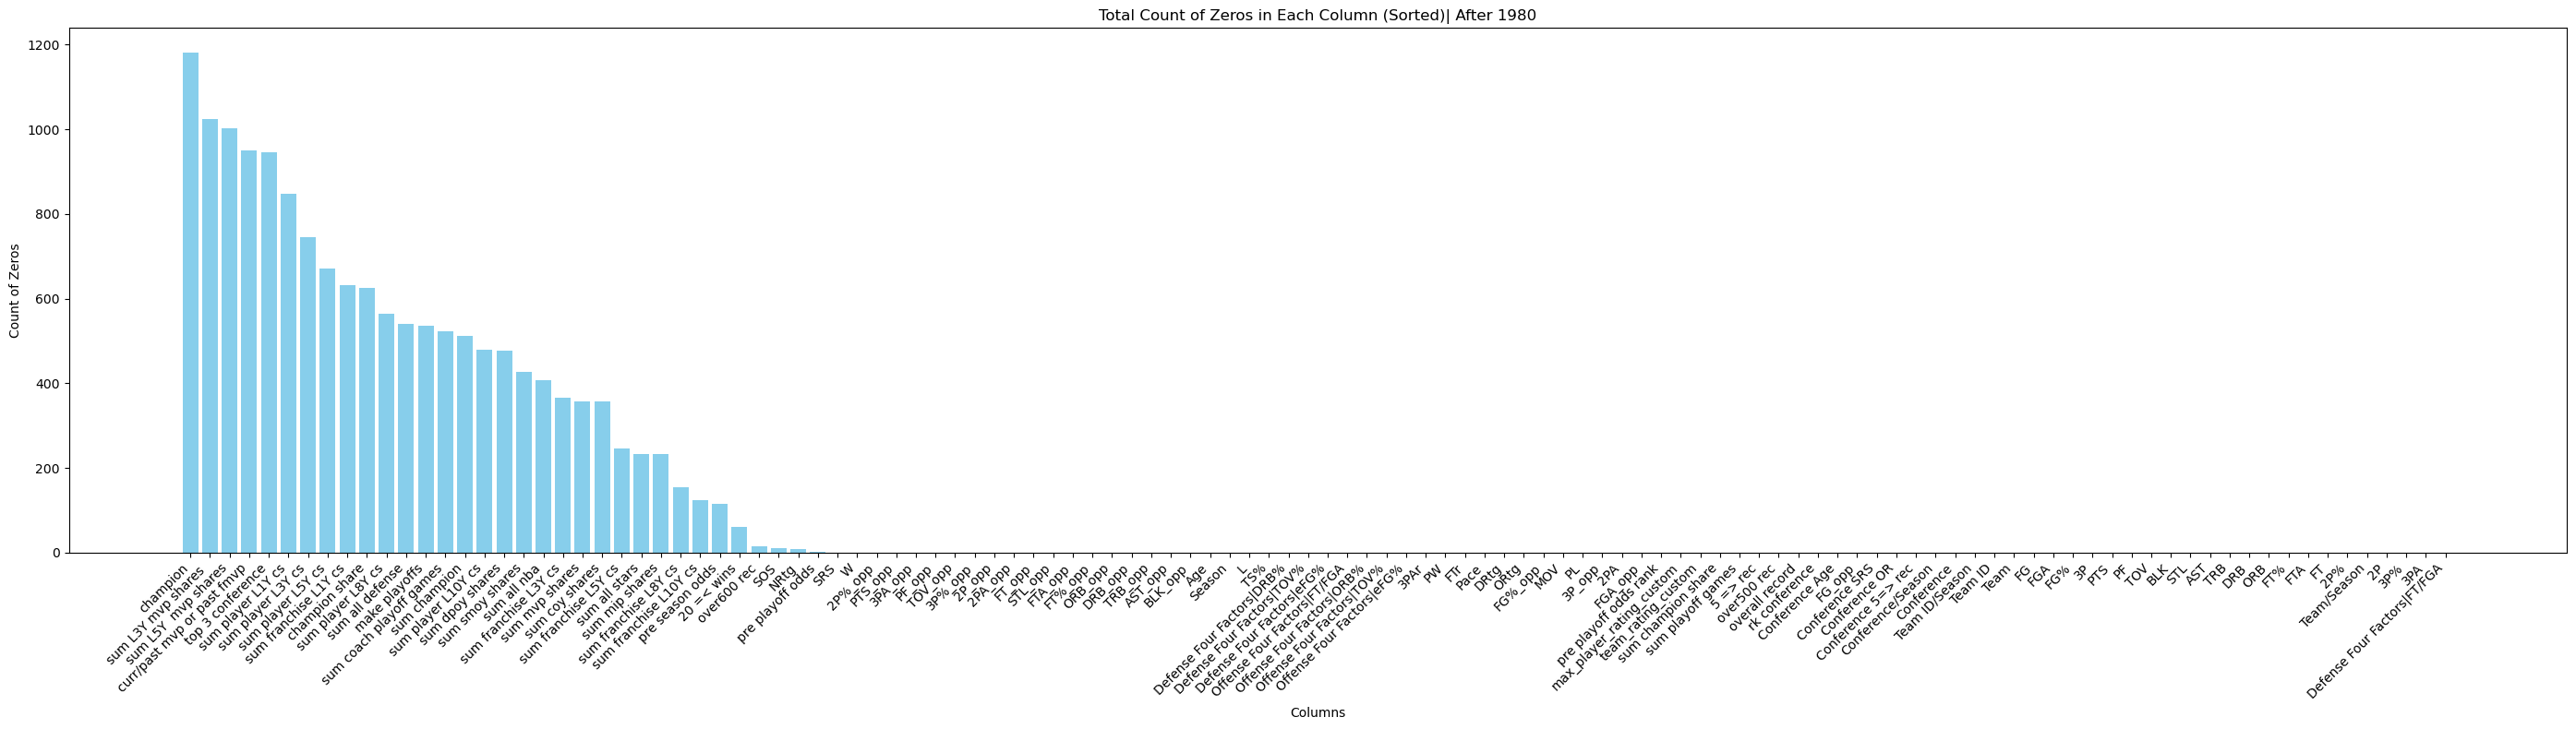

In [5]:
df.drop(df[df['Season'] < 1980].index, inplace = True)
zero_counts = df.eq(0).sum()

zero_counts_sorted = zero_counts.sort_values(ascending=False)

plt.figure(figsize=(28, 8))
plt.bar(zero_counts_sorted.index, zero_counts_sorted.values, color='skyblue')
plt.title('Total Count of Zeros in Each Column (Sorted)| After 1980')
plt.xlabel('Columns')
plt.ylabel('Count of Zeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

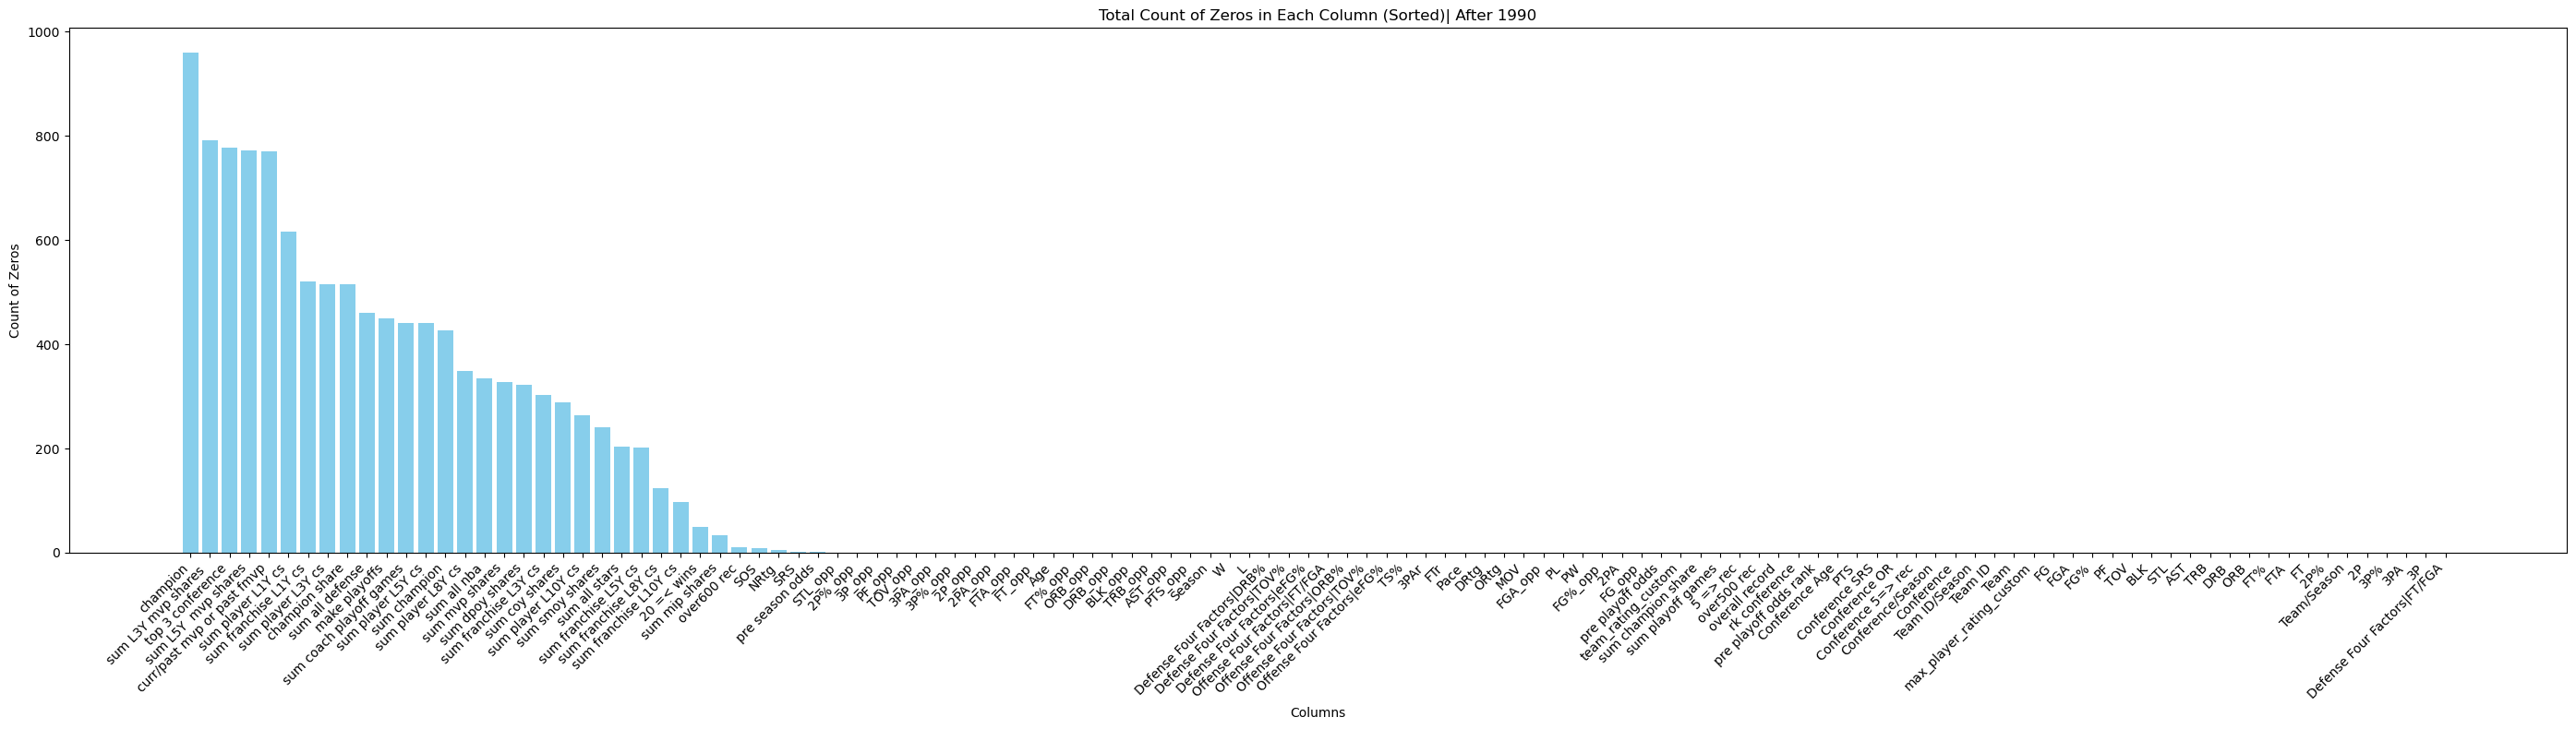

In [6]:
df.drop(df[df['Season'] < 1990].index, inplace = True)

zero_counts = df.eq(0).sum()

zero_counts_sorted = zero_counts.sort_values(ascending=False)

plt.figure(figsize=(28, 8))
plt.bar(zero_counts_sorted.index, zero_counts_sorted.values, color='skyblue')
plt.title('Total Count of Zeros in Each Column (Sorted)| After 1990')
plt.xlabel('Columns')
plt.ylabel('Count of Zeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
data_columns = ['Conference 5=> rec', 'Conference OR', 'Conference SRS', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over500 rec', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum champion share', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum all stars', 'sum player L1Y cs', 'sum player L3Y cs', 'sum player L5Y cs', 'sum player L8Y cs', 'sum player L10Y cs', 'sum L3Y mvp shares ', 'sum L5Y  mvp shares', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L5Y cs', 'sum franchise L8Y cs', 'sum franchise L10Y cs', 'team_rating_custom', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_opp', 'FGA_opp', 'FG%_opp', '3P_opp', '3PA_opp', '3P%_opp', '2P_opp', '2PA_opp', '2P%_opp', 'FT_opp', 'FTA_opp', 'FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp', 'AST_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp', 'PTS_opp', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Offense Four Factors|eFG%', 'Offense Four Factors|TOV%', 'Offense Four Factors|ORB%', 'Offense Four Factors|FT/FGA', 'Defense Four Factors|eFG%', 'Defense Four Factors|TOV%', 'Defense Four Factors|DRB%', 'Defense Four Factors|FT/FGA']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [7]:
correlation_matrix = data.corr()

correlation_threshold = .9

columns_to_remove = set()
print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

Columns to be Removed:
Conference SRS (correlated with Conference OR): 0.98
make playoffs (correlated with pre playoff odds): -1.00
overall record (correlated with rk conference): -0.95
W (correlated with rk conference): -0.91
L (correlated with rk conference): 0.91
MOV (correlated with rk conference): -0.91
NRtg (correlated with rk conference): -0.91
team_rating_custom (correlated with over500 rec): 0.91
W (correlated with over500 rec): 0.92
L (correlated with over500 rec): -0.92
MOV (correlated with over500 rec): 0.92
SRS (correlated with over500 rec): 0.92
NRtg (correlated with over500 rec): 0.92
sum champion share (correlated with sum playoff games): 0.98
sum all stars (correlated with sum all nba): 0.93
sum player L5Y cs (correlated with sum player L3Y cs): 0.94
sum player L10Y cs (correlated with sum player L8Y cs): 0.96
sum L5Y  mvp shares (correlated with sum L3Y mvp shares ): 0.90
sum franchise L10Y cs (correlated with sum franchise L8Y cs): 0.96
PTS (correlated with FG): 0.92

In [26]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'Conference 5=> rec', 'Conference OR', 'Conference Age', 'pre playoff odds', 'pre playoff odds rank', 'pre season odds', 'champion', 'champion share', 'make playoffs', 'top 3 conference', 'rk conference', 'overall record', 'over600 rec', '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum mvp shares', 'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum player L1Y cs', 'sum player L3Y cs', 'sum player L8Y cs', 'sum L3Y mvp shares ', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L8Y cs', 'max_player_rating_custom', 'curr/past mvp or past fmvp', 'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|FT/FGA'

Columns that were removed:
'2PA_opp', 'PW', 'PTS', 'STL_opp', 'Offense Four Factors|eFG%', 'over500 rec', 'Defense Four Fa

In [7]:
features = ['Conference 5=> rec', 'Conference OR', 'Conference Age', 'pre season odds',
            'over600 rec', 'DRtg', 'top 3 conference',
            '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum mvp shares', 
            'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum player L1Y cs', 'sum player L3Y cs','Offense Four Factors|eFG%',
            'sum player L8Y cs', 'sum L3Y mvp shares ', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L8Y cs', 'max_player_rating_custom', 
            'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|FT/FGA']

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 50


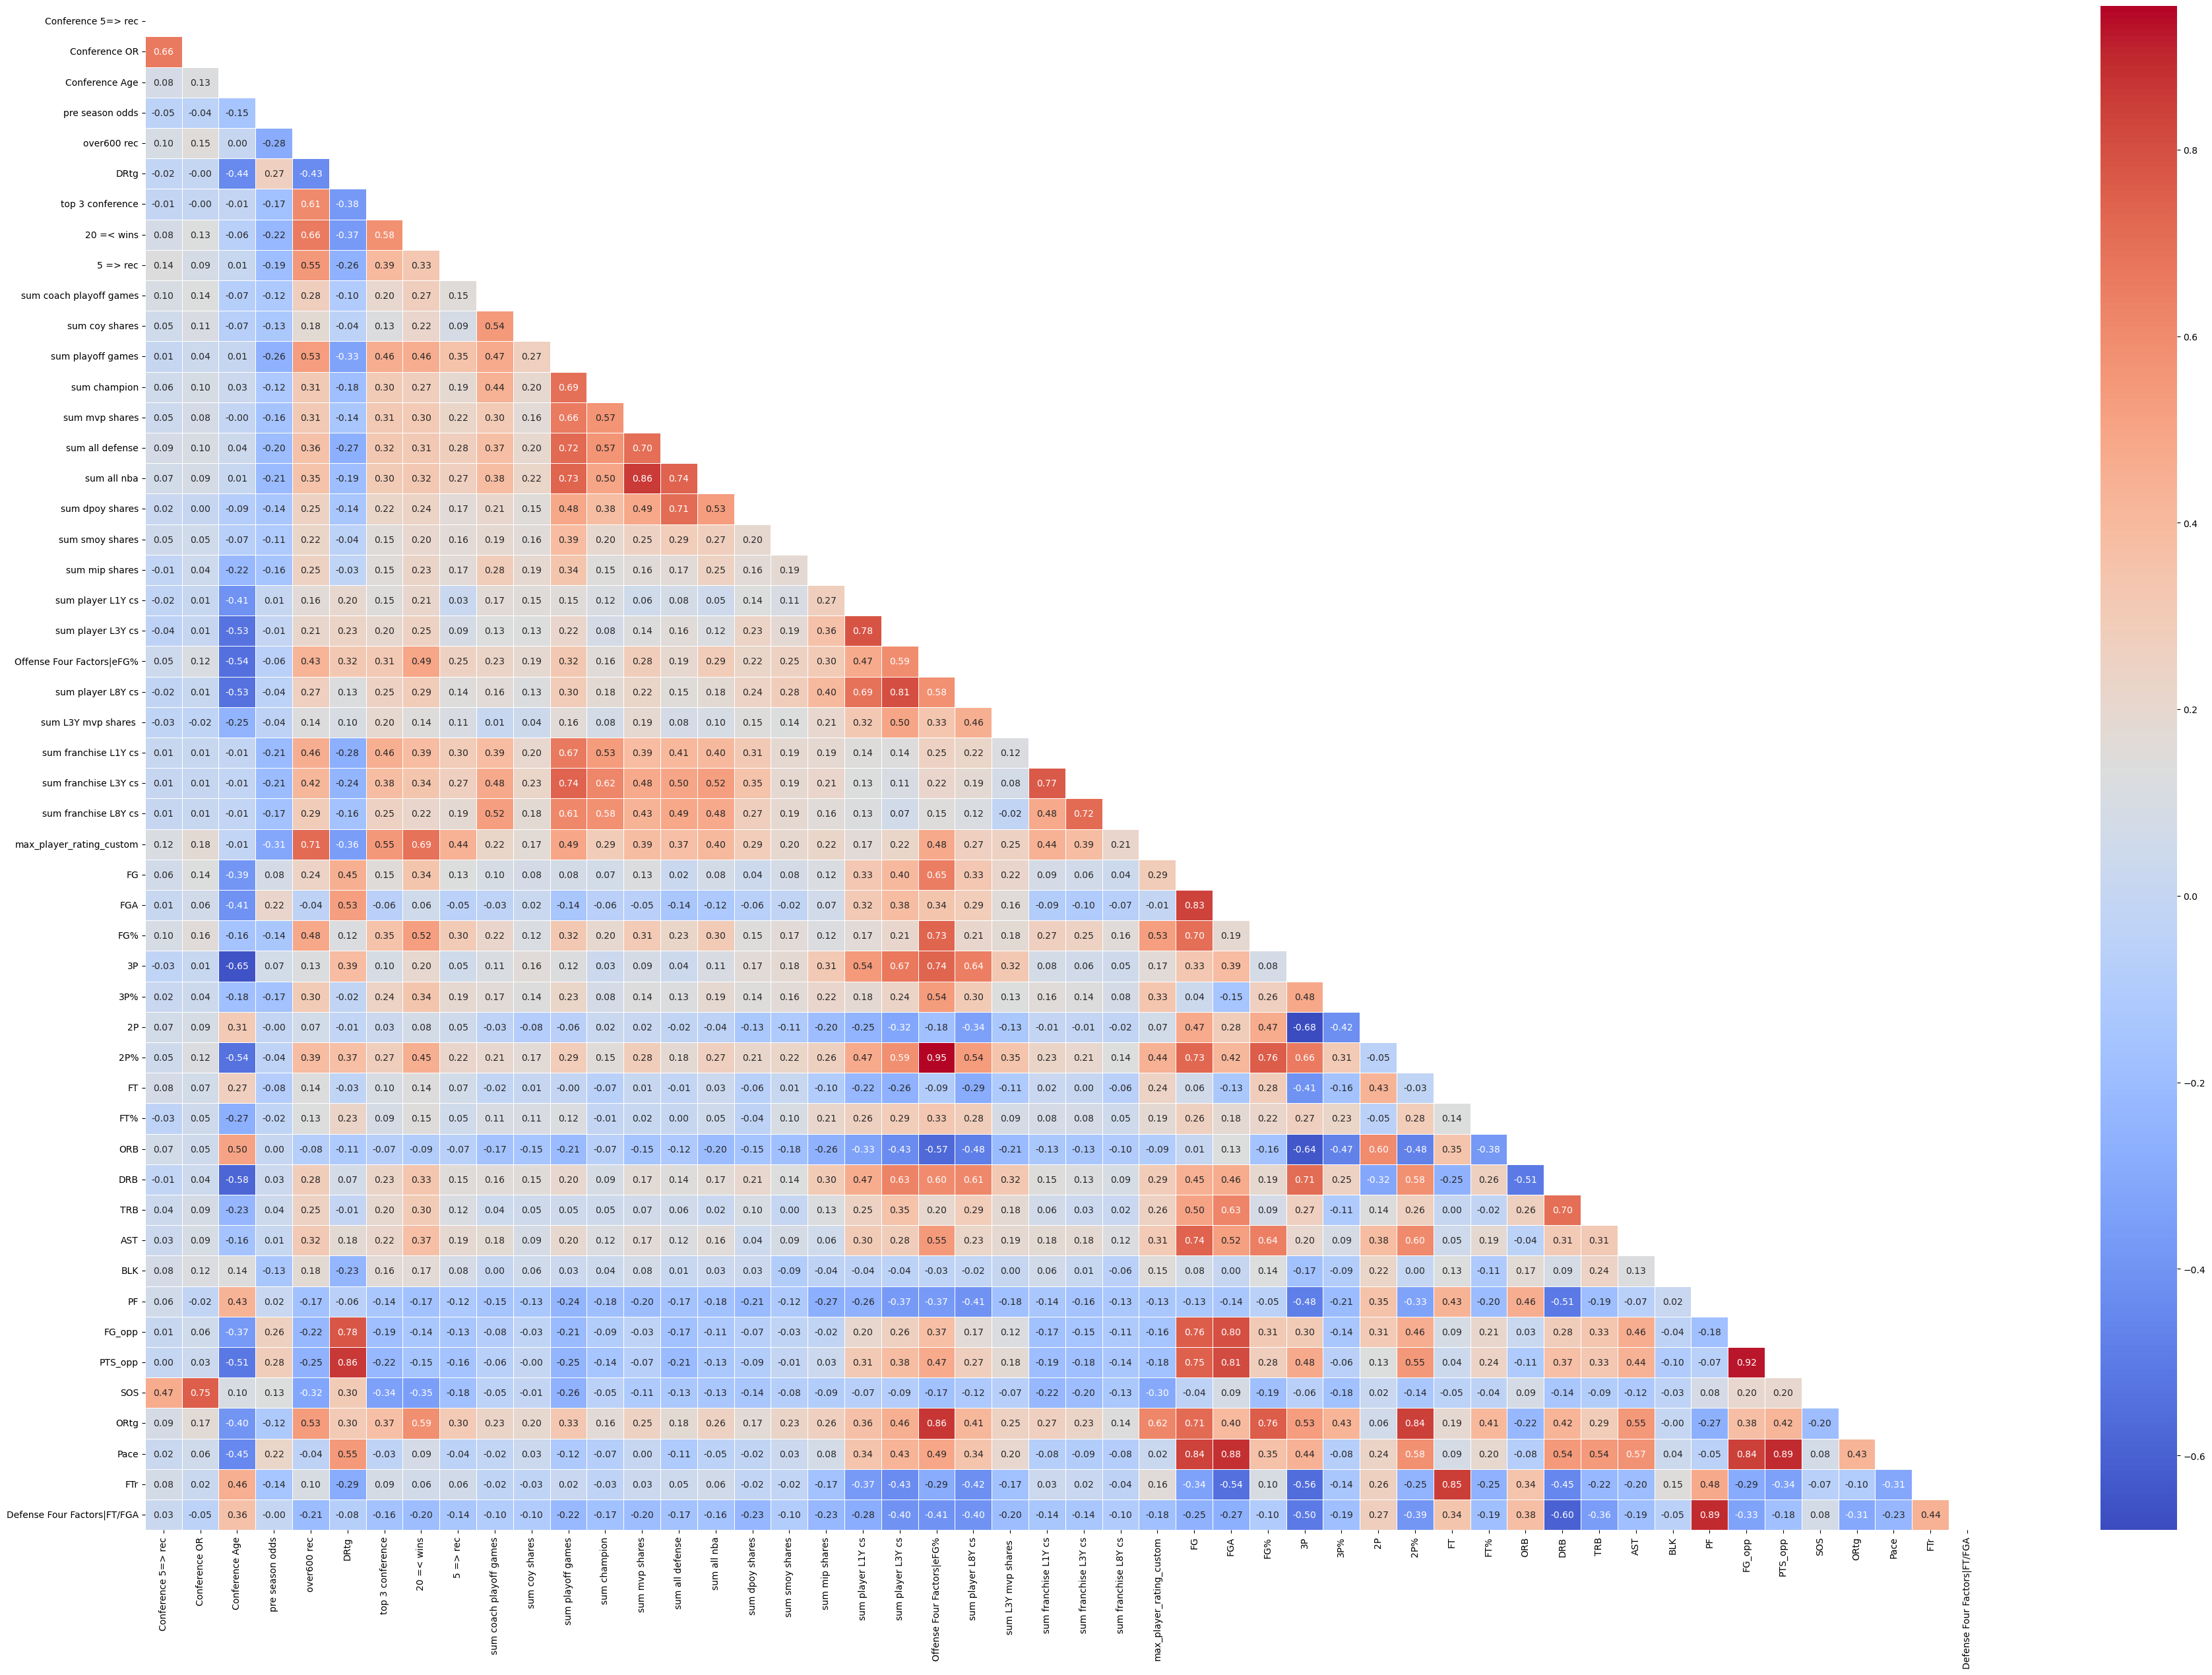

In [17]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(45, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

In [ ]:
### Results Storage

features = ['Conference 5=> rec', 'Conference OR', 'Conference Age', 'pre season odds',
            'top 3 conference', 'over600 rec', 'DRtg',
            '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum mvp shares', 
            'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum player L1Y cs', 'sum player L3Y cs',
            'sum player L8Y cs', 'sum L3Y mvp shares ', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L8Y cs', 'max_player_rating_custom', 
            'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|FT/FGA']
# 1980 and up         
#model parameters
rf = RandomForestRegressor(n_estimators=9, random_state=15, min_samples_split=2, max_depth=5)
rf.fit(train[features], train["champion share"])

#========================================================================================================================================================================================================================

##Best on yet 3:50 12/26/2023
#1990 and up data
features = ['Conference 5=> rec', 'Conference OR', 'Conference Age', 'pre season odds',
            'top 3 conference', 'over600 rec', 'DRtg',
            '20 =< wins', '5 => rec', 'sum coach playoff games', 'sum coy shares', 'sum playoff games', 'sum champion', 'sum mvp shares', 
            'sum all defense', 'sum all nba', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum player L1Y cs', 'sum player L3Y cs',
            'sum player L8Y cs', 'sum L3Y mvp shares ', 'sum franchise L1Y cs', 'sum franchise L3Y cs', 'sum franchise L8Y cs', 'max_player_rating_custom', 
            'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|FT/FGA']

num_features = len(features)

print(f"Number of features: {num_features}")

rf = RandomForestRegressor(n_estimators=16, random_state=5, min_samples_split=2, max_depth=5)

Champion AP for Season 2016: 0.5 | Reciprocal: 2.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 1.0 | Reciprocal: 1.0
Champion AP for Season 2019: 0.25 | Reciprocal: 3.0
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0
Champion AP for Season 2023: 0.5 | Reciprocal: 2.0



rf = RandomForestRegressor(n_estimators=12, random_state=5, min_samples_split=5, max_depth=3)

#========================================================================================================================================================================================================================

In [8]:
train = df[df["Season"] <= 2022].copy()
test = df[df["Season"] > 2022].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features]=sc.transform(train[features])
test[features]=sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=12, random_state=5, min_samples_split=5, max_depth=3)
rf.fit(train[features], train["champion share"])

predictions = rf.predict(test[features]) 
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
frame = df[df["make playoffs"] == 1]
frame = pd.concat([test[["Season", "Team", "champion share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted champion share"], inplace=True, ascending = [False, False])

mae1 = mean_absolute_error(frame["champion share"], frame["predicted champion share"])
mse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"])
rmse1 = mean_squared_error(frame["champion share"], frame["predicted champion share"], squared=False)


print("Error Metrics: ")
print("=============================================================================\n")
print("PT MAE: ", mae1)
print("PT MSE: ", mse1)
print("PT RMSE: ", rmse1)
print("-----------------------------------------------------------------------------\n")


f_list = list(features)
f_importance = pd.Series(rf.feature_importances_, index = f_list).sort_values(ascending = False)
print("Feature Importance: ")
print("=============================================================================\n")
print(f_importance.head(20))
print("-----------------------------------------------------------------------------\n")


frame_playoff = test[test["make playoffs"] == 1]

predictions = rf.predict(frame_playoff[features])
predictions = pd.DataFrame(predictions, columns=["predicted champion share"], index=frame_playoff.index)

frame_playoff = pd.concat([frame_playoff[["Season", "Team", "champion share"]], predictions], axis=1)

frame_playoff.sort_values(["Season", "predicted champion share"], inplace=True, ascending=[False, False])

print("Full Results (Playoff Teams Only):")
print("=============================================================================\n")
print(frame_playoff.head(16))

Error Metrics: 

PT MAE:  0.1536289930845695
PT MSE:  0.050039689610119995
PT RMSE:  0.22369552881119462
-----------------------------------------------------------------------------

Feature Importance: 

top 3 conference            0.804018
over600 rec                 0.063845
pre season odds             0.041780
max_player_rating_custom    0.025328
sum mvp shares              0.010329
ORB                         0.008855
sum player L8Y cs           0.008463
DRtg                        0.005491
20 =< wins                  0.004631
sum all nba                 0.003756
Conference 5=> rec          0.003162
2P                          0.002720
FT                          0.002706
AST                         0.002399
2P%                         0.002290
sum player L3Y cs           0.002121
SOS                         0.002092
FGA                         0.001467
sum franchise L1Y cs        0.001243
PTS_opp                     0.001118
dtype: float64
---------------------------------------

In [9]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

# Average Precision Metric
def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(1) #HEAD

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion share_x  predicted champion share_x  Rank  Season_y  champion share_y  predicted champion share_y  Predicted Rank
0      2023  Denver Nuggets               1.0                    0.556899     1      2023               1.0                    0.556899               1

PT AP Champion:  1.0


In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



all_predictions = []
aps = []

backtest_seasons = [2014,2015,2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
#backtest_seasons = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
combined_predictions = pd.DataFrame(columns=['predicted champion share', 'champion share', 'Team', 'Season', 'Team/Season'])

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
    frame_playoff = pd.concat([test[["Team", "champion share", "Season"]], predictions_df], axis=1)

    frame_playoff['Team/Season'] = frame_playoff['Team'] + ' ' + frame_playoff['Season'].astype(str)
    combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)

    all_predictions.append(frame_playoff)
    ap = find_ap(frame_playoff)
    aps.append(ap)

    reciprocal_ap = 1 / ap
    print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)}")

    aps.append(ap)

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted champion share", ascending=False).head(5)
    
    print(f"\nTop 5Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted champion share", "champion share"]])

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"BT Average Champion AP: {round(average_ap, 2)} | Reciprocal: {round(reciprocal_average_ap, 2)}")
print(f"BT Max Champion AP: {round(min_ap, 2)} | Reciprocal: {round(reciprocal_min_ap, 2)}")
print(f"BT Min Champion AP: {round(max_ap, 2)} | Reciprocal: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

C:\Users\allen\AppData\Local\Temp\ipykernel_16968\1189572747.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)


Champion AP for Season 2014: 0.33 | Reciprocal: 3.0
Champion AP for Season 2015: 1.0 | Reciprocal: 1.0
Champion AP for Season 2016: 1.0 | Reciprocal: 1.0
Champion AP for Season 2017: 1.0 | Reciprocal: 1.0
Champion AP for Season 2018: 1.0 | Reciprocal: 1.0
Champion AP for Season 2019: 0.25 | Reciprocal: 4.0
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0

Top 5Predicted Teams for Season 2014:
                      Team  predicted champion share  champion share
275             Miami Heat                  0.854006          0.8125
271  Oklahoma City Thunder                  0.621456          0.6250
270      San Antonio Spurs                  0.581591          1.0000
272   Los Angeles Clippers                  0.500642          0.3750
273         Indiana Pacers                  0.448649          0.6250

Top 5Predicted Teams for Season 20

In [11]:
actual = frame_playoff.sort_values("champion share", ascending=False)
predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(5)
print("Ranking Accuracy (Top 4):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame_playoff):
    actual = frame_playoff.sort_values("champion share", ascending=False).head(5)

    predicted = frame_playoff.sort_values("predicted champion share", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame_playoff)
print("=============================================================================\n")
print("PT AP Top 4: ", ap)

Ranking Accuracy (Top 4):

                 Team  champion share_x  Season_x  predicted champion share_x            Team/Season_x  Rank  champion share_y  Season_y  predicted champion share_y            Team/Season_y  Predicted Rank
0      Denver Nuggets            1.0000      2023                    0.556899      Denver Nuggets 2023     1            1.0000      2023                    0.556899      Denver Nuggets 2023               1
1          Miami Heat            0.8125      2023                    0.169282          Miami Heat 2023     2            0.8125      2023                    0.169282          Miami Heat 2023              10
2      Boston Celtics            0.6875      2023                    0.545169      Boston Celtics 2023     3            0.6875      2023                    0.545169      Boston Celtics 2023               3
3  Los Angeles Lakers            0.5000      2023                    0.120376  Los Angeles Lakers 2023     4            0.5000      2023             

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


all_predictions = []
aps = []

backtest_seasons = [2015, 2016, 2017, 2018, 2019, 2020,2021, 2022, 2023]
combined_predictions = pd.DataFrame(columns=['predicted champion share', 'champion share', 'Team', 'Season', 'Team/Season'])

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted champion share"], index=test.index)
    frame_playoff = pd.concat([test[["Team", "champion share", "Season"]], predictions_df], axis=1)


    frame_playoff['Team/Season'] = frame_playoff['Team'] + ' ' + frame_playoff['Season'].astype(str)
    combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)

    all_predictions.append(frame_playoff)
    ap = find_ap(frame_playoff)
    aps.append(ap)

    reciprocal_ap = 1 / ap
    print(f"Top 5 AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)}")

    aps.append(ap)


for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted champion share", ascending=False).head(16)

average_mae = np.mean([mean_absolute_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_mse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"]) for fp in all_predictions])
average_rmse = np.mean([mean_squared_error(fp["champion share"], fp["predicted champion share"], squared=False) for fp in all_predictions])
average_ap = np.mean(aps)

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"BT Average Top 5 AP: {round(average_ap, 2)} | Reciprocal: {round(reciprocal_average_ap, 2)}")
print(f"BT Max Top 5 AP: {round(min_ap, 2)} | Reciprocal: {round(reciprocal_min_ap, 2)}")
print(f"BT Min Top 5 AP: {round(max_ap, 2)} | Reciprocal: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

C:\Users\allen\AppData\Local\Temp\ipykernel_16968\3314058503.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_predictions = pd.concat([combined_predictions, frame_playoff], ignore_index=True)


Top 5 AP for Season 2015: 0.97 | Reciprocal: 1.03
Top 5 AP for Season 2016: 0.73 | Reciprocal: 1.37
Top 5 AP for Season 2017: 0.81 | Reciprocal: 1.24
Top 5 AP for Season 2018: 0.9 | Reciprocal: 1.11
Top 5 AP for Season 2019: 0.83 | Reciprocal: 1.21
Top 5 AP for Season 2020: 0.83 | Reciprocal: 1.21
Top 5 AP for Season 2021: 0.54 | Reciprocal: 1.84
Top 5 AP for Season 2022: 0.63 | Reciprocal: 1.58
Top 5 AP for Season 2023: 0.62 | Reciprocal: 1.61

Average Error Metrics Across All Seasons:
BT Average Top 5 AP: 0.76 | Reciprocal: 1.31
BT Max Top 5 AP: 0.54 | Reciprocal: 1.84
BT Min Top 5 AP: 0.83 | Reciprocal: 1.21


In [13]:
combined_predictions.to_csv('L4S Preds RF.csv', index=False)

Top Features:
['top 3 conference', 'over600 rec', 'max_player_rating_custom', 'pre season odds', '2P%', 'ORB', 'sum player L3Y cs', '20 =< wins', 'sum mvp shares', '2P', 'sum all nba', 'sum player L8Y cs', 'FT', 'AST', 'SOS', 'DRtg', 'sum franchise L1Y cs', '5 => rec', 'Conference 5=> rec', 'FGA', 'sum coach playoff games', 'PTS_opp', 'Defense Four Factors|FT/FGA', 'FG', 'TRB', 'Conference OR', 'Conference Age', 'Pace', 'ORtg', 'FG_opp', 'PF', 'BLK', 'sum coy shares', 'sum playoff games', 'sum champion', 'FG%', 'sum all defense', 'sum dpoy shares', 'sum smoy shares', 'sum mip shares', 'sum player L1Y cs', 'FT%', 'Offense Four Factors|eFG%', '3P%', 'sum L3Y mvp shares ', 'FTr', 'sum franchise L3Y cs', 'sum franchise L8Y cs', '3P', 'DRB']


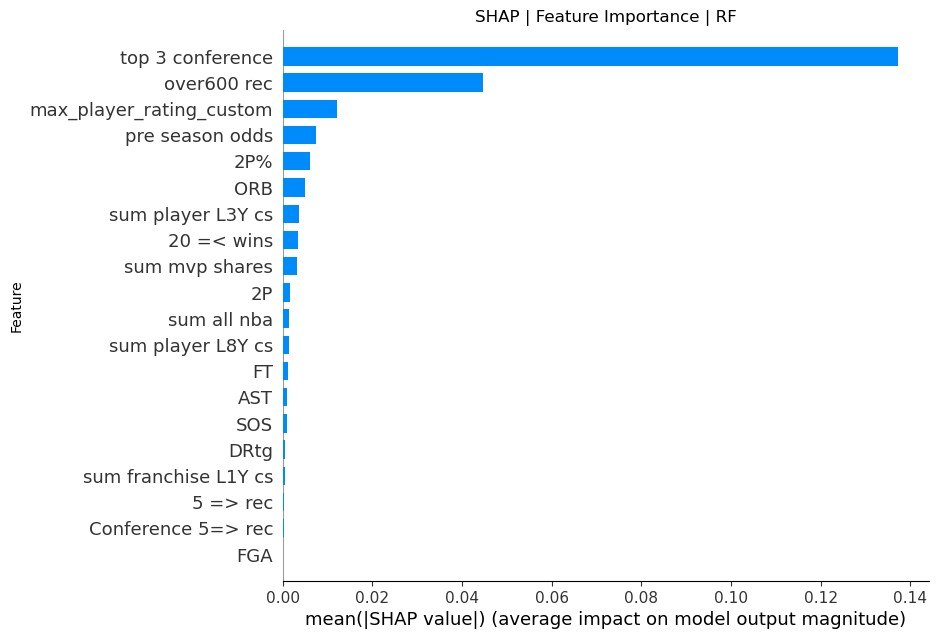

In [14]:
import shap
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])

shap.summary_plot(shap_values, test[features], feature_names=features, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Feature Importance | RF')
plt.savefig("rf_shap_bar.png", bbox_inches='tight', pad_inches=0.1)

image = Image.open("rf_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_bar.png")

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1]

top_features_list = [features[index] for index in top_features]
print("Top Features:")
print(top_features_list)

plt.ylabel("Feature")
plt.show()

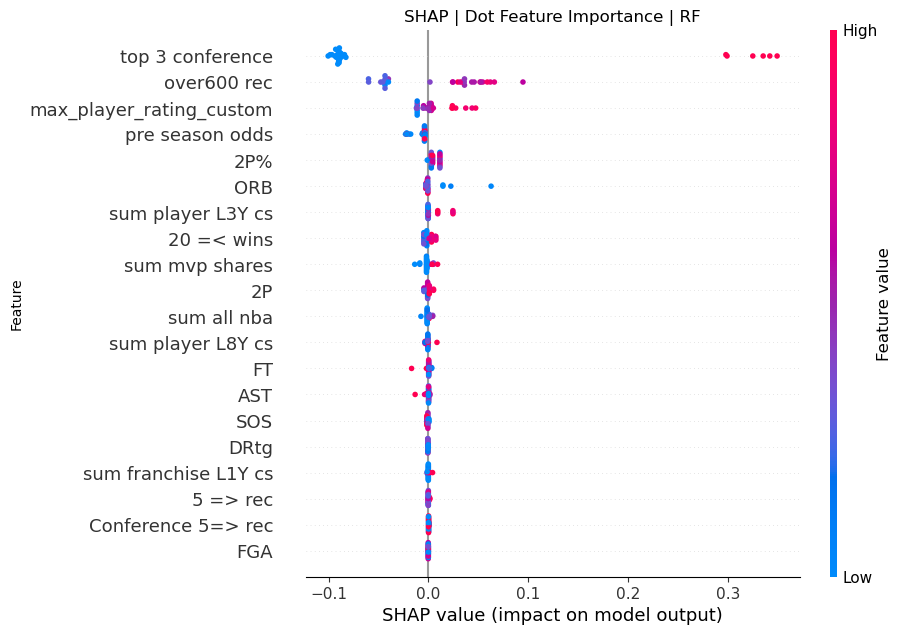

In [15]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])
shap.summary_plot(shap_values, test[features], feature_names=features, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | RF')

plt.savefig("rf_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rf_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_dot.png")

plt.ylabel("Feature")
plt.show()